### Sumário

- Introdução
- Descrição matemática distribuição normal
- Amostrando uma distribuição Gaussiana e visualisando com histogramas
- Estimando a média e desvio padrão de uma gaussiana
- Comparação histograma, a curva teórica e curva estimada
- Conclusão

### Introdução

Neste tópico vamos apenas apresentar uma das mais importantes distribuições de probabilidade, a distribuição normal ou distribuição gaussiana. Sua importância se dá não somente por sua simplicidade mas por seu aparecimento no estudo dos mais diversos fenômenos da natureza e sua conexação todas as outras distribuições de probabilidade através do teorema do limite central (assunto para outro texto). 

Aqui vamos apresentar os aspectos básicos da distribuição gaussian, os parâmetros que a definem, sua curva teórica, como obter amostras de tal função densidade de probabilidade (probability density function - pdf), e como visualizar a sua pdf através da amostras com o uso de histogramas.


### Descrição matemática de uma distribuição normal

A distribuação gaussian de 1 dimenção, é descrita através de somente 2 parâmetros, sua média e seu desvio padrão, comumente representado pela letra $\sigma$. Sua equação é:

$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x - \mu}{\sigma})^2}$

Como podemos ver, seu valor máximo ocorre quando x = $\mu$, e decai conforme se afasta deste,já o parâmetro $\sigma$ dita o quão rápido é esse decaimento, ou o quão provável é termos uma amostra mais distante da média. Podemos ver algumas curvas para diferentes valores $\sigma$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gaussian(x, mu, std):
    return np.exp(-0.5*((x-mu)/std)**2)/(std*np.sqrt(2*np.pi))

In [3]:
mu = 0
std = [1, 2, 4] # aka, sigma
x = np.linspace(-15, 15, 1000)
y_gauss = [gaussian(x, mu, sigma) for sigma in std]

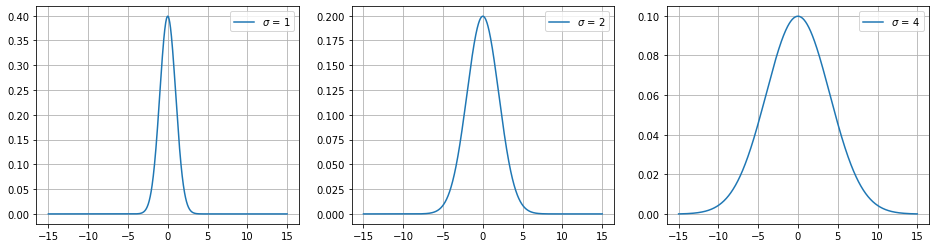

In [4]:
fig, axs = plt.subplots(1, len(y_gauss), figsize=(16,4))
for ax, y_data, sigma in zip(axs, y_gauss, std):
  ax.plot(x, y_data)
  ax.legend(["$\sigma$ = " + str(sigma)])
  ax.grid()


É válido lembrar que os valores do eixo y não correspondem diretamente a probabilidade de um valor e sim a densidade de probabilidade em um determinado ponto.

### Amostrando uma distribuição Gaussiana e visualisando com histogramas


Para amostrar pdf com numpy, basta chamarmos a função normal com o número de amostras escolhido, vejamos:

In [5]:
sample_size = [20, 300, 1000]
gaussian_samples = [np.random.normal(mu, std[1], sample_sz) for sample_sz in sample_size]

Podemos aproximar a pdf através das amostras com a construção de um histograma. A construção de histogramas consiste em agrupar amostras em faixas e contar quantas amostras há em cada faixa, obtendo um gráfico em barra. Este gráfico serve como aproximação da forma da pdf da qual as amostras foram obtidas, porém as regiões de menor pdf tendem a não ser bem representadas pois é mais dificil obtermos amostras dessas regiões.

Vamos ver os histogramas obtidos a partir das amostras coletadas. 

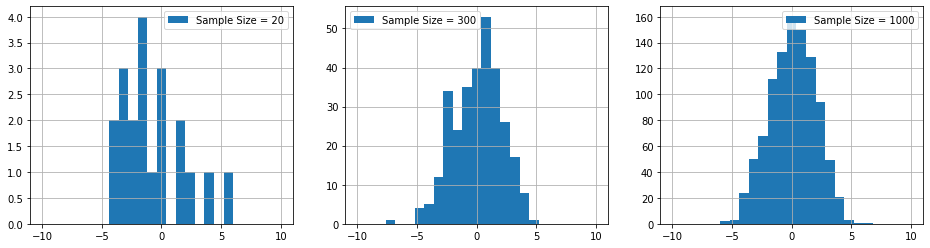

In [6]:
fig, axs = plt.subplots(1, len(gaussian_samples), figsize=(16,4))
for ax, samples in zip(axs, gaussian_samples):
  ax.hist(samples, bins=25, range=(-10, 10))
  ax.legend(["Sample Size = " + str(len(samples))])
  ax.grid()


É facil notar a melhora da estimativa com o aumento do número de amostras, pois o gráfico se aproxima de uma gaussiana. 

### Estimando a média e desvio padrão de uma gaussiana

Além da visualização das amostras através de histogramas, também pode ser interessante construir uma pdf aproxima atraves da estimação dos parâmtros que definem uma pdf gaussiana, isto é, sua média e desvio padrão. Por hoje vamos adotar as aproximações descritas pelas equações abaixo, no futuro, discutiremos justificativas para tais aproximações.

$\mu = \sum_{i=0}^{i=n}x_i/n$ 

$\sigma=\sqrt{\sum_{i=0}^{i=n}(x_i-\mu)^2/(n-1)}$

Estes cálculos podem ser facilmente feitos com numpy

In [7]:
mu_estimation = [np.mean(samples) for samples in gaussian_samples]
sigma_estimation = [np.std(samples) for samples in gaussian_samples]

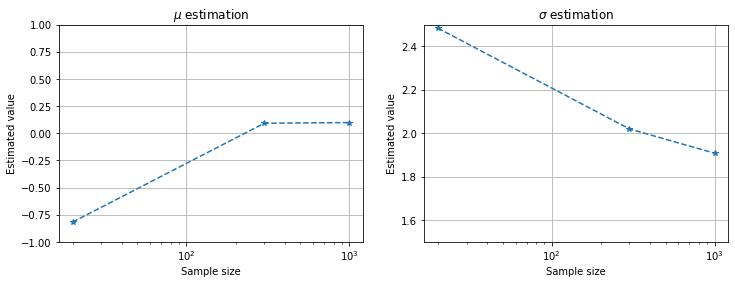

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].semilogx(sample_size, mu_estimation, '*--')
axs[0].set_ylim([-1, 1])
axs[0].set_title("$\mu$ estimation")
axs[0].set_xlabel("Sample size")
axs[0].set_ylabel("Estimated value")
axs[0].grid()
axs[1].semilogx(sample_size, sigma_estimation, '*--')
axs[1].set_ylim([1.5, 2.5])
axs[1].set_title("$\sigma$ estimation")
axs[1].set_xlabel("Sample size")
axs[1].set_ylabel("Estimated value")
axs[1].grid()


Neste caso, sabemos o valor real da pdf amostrado com $\mu$ = 0 e $\sigma$ = 2, e notamos que assim como no caso do histograma, nossas estimativas melhoraram com o aumento de número de amostras usadas. Vale lembrar que os valores estimados podem variar com diferentes rodadas do experimento, isto é, das amostras coletadas

### Comparação histograma, a curva teórica e curva estimada

Vamos por fim comparar a curva teórica com a curva obtida pelo histograma e a curva com os parâmtros estimados. Para isso precisamos normalizar o histograma para que tenha um área igual 1 e se caracterize como uma pdf, isso pode ser feito através da opção density.

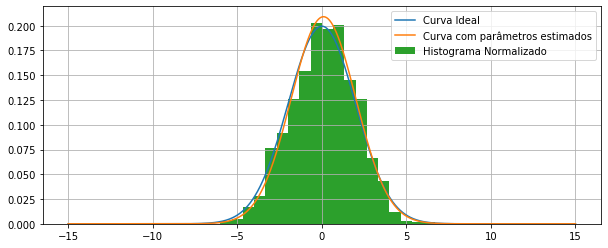

In [20]:
fig = plt.figure(figsize=(10,4))
plt.plot(x, y_gauss[1]);
plt.plot(x, gaussian(x, mu_estimation[2], sigma_estimation[2]));
plt.hist(gaussian_samples[2], bins=30, range=(-10, 10), density=True);
plt.legend(["Curva Ideal", "Curva com parâmetros estimados", "Histograma Normalizado"])
plt.grid()

Notamos uma grande coincidência estre as curvas com parâmetros estimandos, a curva ideial e pdf obtida através da normalização do histograma.

### Conclusão

Neste tópico discutimos:
- Uma das principais densidades de probabilidades, a  distribuição gaussia.
- Os parâmetros que a definem (média e desvio padrão)
- Como obter amostras de um variável aleatória com distribuição normal.
- Como visualizar/estimar a pdf através de um histogramas
- Para o caso gaussiana, como estimar seus parâmetros atraves dos dados.
- Uma comparação entre a curva ideal, curva com parâmetros estimados e o histograma normalizado.